=== Example 1: Small Tournament ===
Round Robin Schedule:
Round 1: [('A', 'F'), ('B', 'E'), ('C', 'D')]
Round 2: [('A', 'E'), ('F', 'D'), ('B', 'C')]
Round 3: [('A', 'D'), ('E', 'C'), ('F', 'B')]
Round 4: [('A', 'C'), ('D', 'B'), ('E', 'F')]
Round 5: [('A', 'B'), ('C', 'F'), ('D', 'E')]


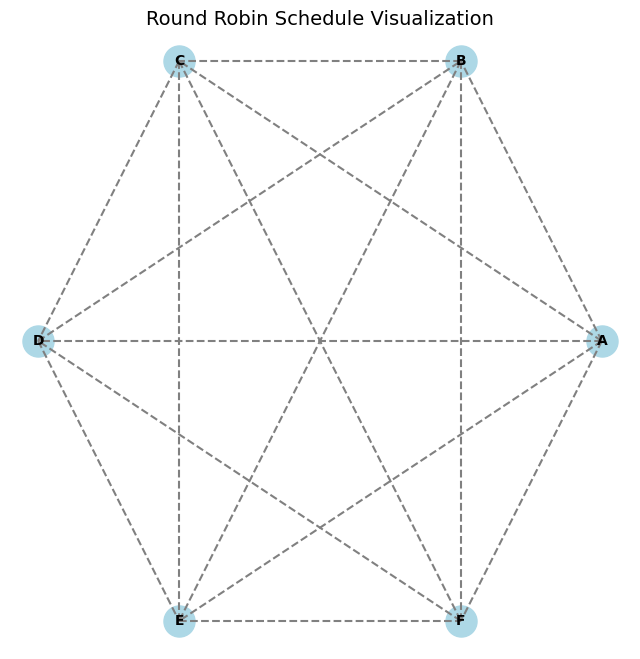

Knockout Participants: ['A', 'D']
Single Elimination Schedule:
Round 1:
  A vs D

=== Example 2: Medium Tournament ===
Round Robin Schedule (Medium Tournament):
Round 1: [('P1', 'P8'), ('P2', 'P7'), ('P3', 'P6'), ('P4', 'P5')]
Round 2: [('P1', 'P7'), ('P8', 'P6'), ('P2', 'P5'), ('P3', 'P4')]
Round 3: [('P1', 'P6'), ('P7', 'P5'), ('P8', 'P4'), ('P2', 'P3')]
Round 4: [('P1', 'P5'), ('P6', 'P4'), ('P7', 'P3'), ('P8', 'P2')]
Round 5: [('P1', 'P4'), ('P5', 'P3'), ('P6', 'P2'), ('P7', 'P8')]
Round 6: [('P1', 'P3'), ('P4', 'P2'), ('P5', 'P8'), ('P6', 'P7')]
Round 7: [('P1', 'P2'), ('P3', 'P8'), ('P4', 'P7'), ('P5', 'P6')]


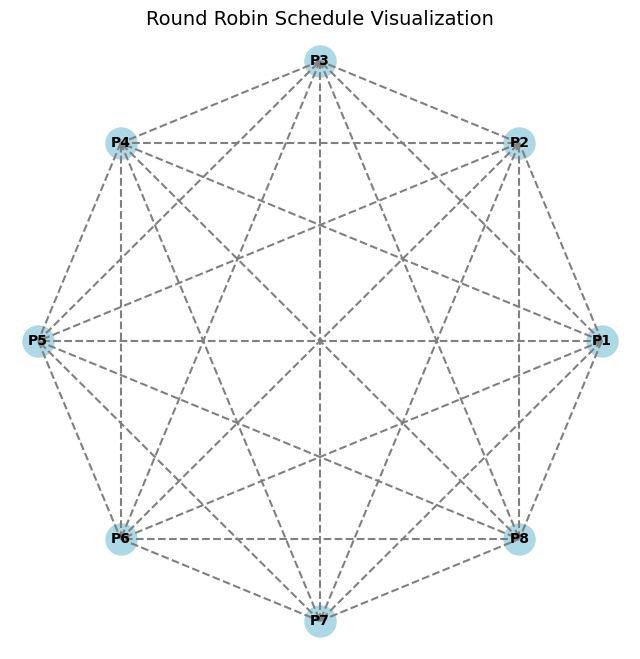

Knockout Participants: ['P1', 'P5']
Single Elimination Schedule:
Round 1:
  P1 vs P5

=== Example 3: Large Tournament ===
Round Robin Schedule (Large Tournament):
Round 1: [('Team_1', 'Team_16'), ('Team_2', 'Team_15'), ('Team_3', 'Team_14'), ('Team_4', 'Team_13'), ('Team_5', 'Team_12'), ('Team_6', 'Team_11'), ('Team_7', 'Team_10'), ('Team_8', 'Team_9')]
Round 2: [('Team_1', 'Team_15'), ('Team_16', 'Team_14'), ('Team_2', 'Team_13'), ('Team_3', 'Team_12'), ('Team_4', 'Team_11'), ('Team_5', 'Team_10'), ('Team_6', 'Team_9'), ('Team_7', 'Team_8')]
Round 3: [('Team_1', 'Team_14'), ('Team_15', 'Team_13'), ('Team_16', 'Team_12'), ('Team_2', 'Team_11'), ('Team_3', 'Team_10'), ('Team_4', 'Team_9'), ('Team_5', 'Team_8'), ('Team_6', 'Team_7')]
Round 4: [('Team_1', 'Team_13'), ('Team_14', 'Team_12'), ('Team_15', 'Team_11'), ('Team_16', 'Team_10'), ('Team_2', 'Team_9'), ('Team_3', 'Team_8'), ('Team_4', 'Team_7'), ('Team_5', 'Team_6')]
Round 5: [('Team_1', 'Team_12'), ('Team_13', 'Team_11'), ('Team_1

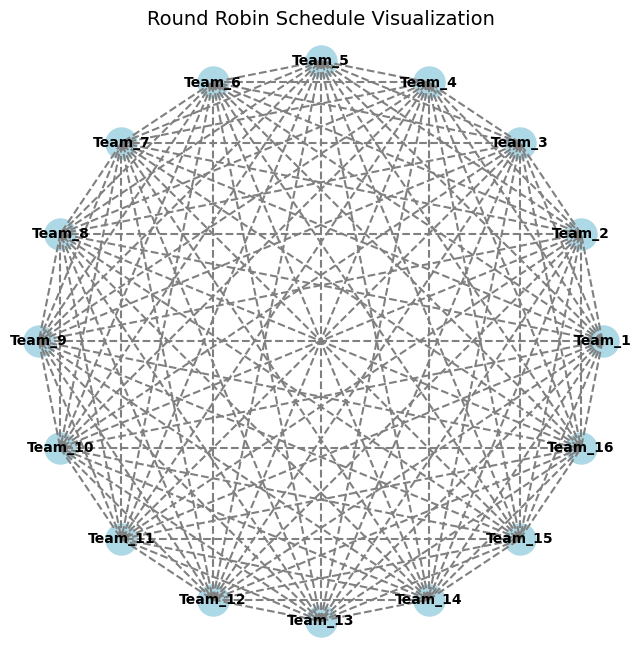

Knockout Participants: ['Team_1', 'Team_2', 'Team_9', 'Team_10']
Single Elimination Schedule:
Round 1:
  Team_1 vs Team_2
  Team_9 vs Team_10
Round 2:
  Team_1 vs Team_9


In [13]:
import math
import matplotlib.pyplot as plt

# Step 1: Generate Round Robin Schedule
def round_robin_schedule(participants):
    """
    Generate a Round Robin schedule for participants.
    """
    if len(participants) % 2 != 0:
        participants.append('Bye')  # Add 'Bye' for odd number of participants

    n = len(participants)
    schedule = []
    for round_number in range(n - 1):
        matches = [(participants[i], participants[n - 1 - i]) for i in range(n // 2)]
        participants = [participants[0]] + [participants[-1]] + participants[1:-1]
        schedule.append(matches)
    return schedule

# Step 2: Visualize Round Robin Schedule
def visualize_round_robin(participants, schedule):
    """
    Visualize the Round Robin schedule as a circular graph.
    """
    positions = [
        (math.cos(i * 2 * math.pi / len(participants)), math.sin(i * 2 * math.pi / len(participants)))
        for i in range(len(participants))
    ]

    # Draw participants as nodes
    plt.figure(figsize=(8, 8))
    plt.title("Round Robin Schedule Visualization", fontsize=14)
    plt.axis("off")
    for i, (x, y) in enumerate(positions):
        plt.scatter(x, y, s=500, color='lightblue')
        plt.text(x, y, participants[i], ha="center", va="center", fontsize=10, fontweight="bold")

    # Draw matches as edges
    for round_matches in schedule:
        for match in round_matches:
            if 'Bye' not in match:
                idx1 = participants.index(match[0])
                idx2 = participants.index(match[1])
                x1, y1 = positions[idx1]
                x2, y2 = positions[idx2]
                plt.plot([x1, x2], [y1, y2], linestyle="--", color="gray")
    plt.show()

# Step 3: Advance Winners to Knockout Stage
def advance_to_knockout(round_robin_results, top_k_per_group=1):
    """
    Advance top performers to the knockout stage based on scores.
    """
    knockout_participants = []
    for group in round_robin_results:
        sorted_group = sorted(group, key=lambda x: x['score'], reverse=True)
        knockout_participants.extend(sorted_group[:top_k_per_group])
    return [player['name'] for player in knockout_participants]

# Step 4: Single Elimination Schedule
def single_elimination_schedule(participants):
    """
    Generate a Single Elimination schedule for participants.
    """
    schedule = []
    while len(participants) > 1:
        round_matches = [(participants[i], participants[i + 1]) for i in range(0, len(participants), 2)]
        schedule.append(round_matches)
        # Assume the first player in each match wins (placeholder logic)
        participants = [match[0] for match in round_matches]
    return schedule

# Step 5: Visualize Single Elimination Schedule
def visualize_single_elimination(schedule):
    """
    Visualize the Single Elimination schedule.
    """
    print("Single Elimination Schedule:")
    for round_number, round_matches in enumerate(schedule, start=1):
        print(f"Round {round_number}:")
        for match in round_matches:
            print(f"  {match[0]} vs {match[1]}")

# Main Function
if __name__ == "__main__":
    # Example 1: Small Tournament
    print("=== Example 1: Small Tournament ===")
    participants = ["A", "B", "C", "D", "E", "F"]
    round_robin = round_robin_schedule(participants)
    print("Round Robin Schedule:")
    for round_number, matches in enumerate(round_robin, start=1):
        print(f"Round {round_number}: {matches}")
    visualize_round_robin(participants, round_robin)

    round_robin_results = [
        [{"name": "A", "score": 3}, {"name": "B", "score": 2}, {"name": "C", "score": 1}],
        [{"name": "D", "score": 3}, {"name": "E", "score": 2}, {"name": "F", "score": 1}]
    ]
    knockout_participants = advance_to_knockout(round_robin_results)
    print(f"Knockout Participants: {knockout_participants}")
    single_elim = single_elimination_schedule(knockout_participants)
    visualize_single_elimination(single_elim)

    # Example 2: Medium Tournament
    print("\n=== Example 2: Medium Tournament ===")
    participants_medium = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8"]
    round_robin_medium = round_robin_schedule(participants_medium)
    print("Round Robin Schedule (Medium Tournament):")
    for round_number, matches in enumerate(round_robin_medium, start=1):
        print(f"Round {round_number}: {matches}")
    visualize_round_robin(participants_medium, round_robin_medium)

    round_robin_results_medium = [
        [{"name": "P1", "score": 4}, {"name": "P2", "score": 3}, {"name": "P3", "score": 2}, {"name": "P4", "score": 1}],
        [{"name": "P5", "score": 4}, {"name": "P6", "score": 3}, {"name": "P7", "score": 2}, {"name": "P8", "score": 1}]
    ]
    knockout_participants_medium = advance_to_knockout(round_robin_results_medium)
    print(f"Knockout Participants: {knockout_participants_medium}")
    single_elim_medium = single_elimination_schedule(knockout_participants_medium)
    visualize_single_elimination(single_elim_medium)

    # Example 3: Large Tournament
    print("\n=== Example 3: Large Tournament ===")
    participants_large = [f"Team_{i}" for i in range(1, 17)]  # 16 participants
    round_robin_large = round_robin_schedule(participants_large)
    print("Round Robin Schedule (Large Tournament):")
    for round_number, matches in enumerate(round_robin_large, start=1):
        print(f"Round {round_number}: {matches}")
    visualize_round_robin(participants_large, round_robin_large)

    round_robin_results_large = [
        [{"name": f"Team_{i}", "score": 10 - i} for i in range(1, 9)],
        [{"name": f"Team_{i}", "score": 10 - i} for i in range(9, 17)]
    ]
    knockout_participants_large = advance_to_knockout(round_robin_results_large, top_k_per_group=2)
    print(f"Knockout Participants: {knockout_participants_large}")
    single_elim_large = single_elimination_schedule(knockout_participants_large)
    visualize_single_elimination(single_elim_large)
